In [1]:
# importing project dependencies:

# compute dependency
import numpy as np
# dataframe dependency
import pandas as pd
# visualization dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.express as px
# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine
# from scraping some data
import webbrowser


import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing in the dataset

In [3]:
df = pd.read_csv('Customer_Churn.csv')

In [4]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.drop('Unnamed: 0',1,inplace=True)

In [6]:
# get the shape of the data.
df.shape

(7043, 21)

In [7]:
# inforamtion on the columns of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# seperating the chategorical and the numerical features into different lists

In [9]:
from feature_engine.missing_data_imputers import _find_categorical_variables,_find_numerical_variables

In [10]:
num_var = _find_numerical_variables(df)
cat_var = _find_categorical_variables(df)

In [11]:
num_var

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [12]:
cat_var

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [13]:
# checking for any missing data in the dataset

In [14]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
# checking for any highly correlated features in the dataset.
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


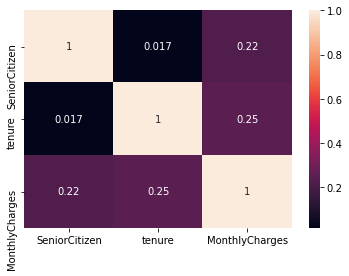

In [16]:
# plotting the correlation heatmap
sns.heatmap(df.corr(),annot=True)

* Initial infereneces:
    * There are more than 7000 samples in this datset.
    * This datset has 20 features.
    * Out of these 20 feautres 3 are numerical and the rest are categorical
    * This is no missing data in this dataset, though there is a high change of dirty data.
    * There are no highly correlated features in the dataset.

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [19]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
144,1131-QQZEB,Male,1,Yes,No,71,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.95,1756.2,No
822,7975-TZMLR,Male,0,No,No,47,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,103.10,4889.3,No
413,5973-EJGDP,Male,0,No,No,51,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,87.35,4473,No
4333,5325-UWTWJ,Male,0,Yes,No,31,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),90.55,2929.75,No
4882,8404-VIOMB,Female,0,No,No,66,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),62.50,4136.4,No


## Univariate Analysis.

In [20]:
# gender

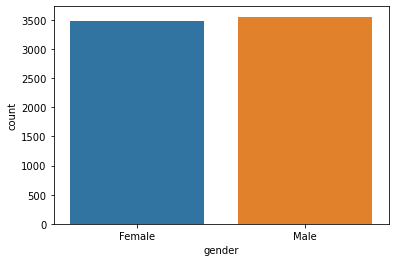

In [21]:
sns.countplot(df.gender)

In [22]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

* No is no bias in the gender feature.Both of the genders are 50 percent in capacity in this dataset.

In [23]:
# Senior-Citizen

In [24]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

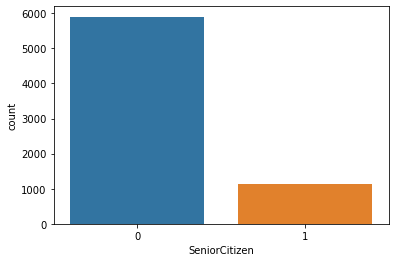

In [25]:
sns.countplot(df.SeniorCitizen)

In [26]:
df.SeniorCitizen.value_counts()/len(df)*100

0    83.785319
1    16.214681
Name: SeniorCitizen, dtype: float64

* Senior City is a binary feature. (Yes or No)
* Most of the people are not senior citizens.
* 16 percnet of the total sample are Senior Citizens.

In [27]:
# Partner

In [28]:
df.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

* This variable shows you have taking the telecom connection individually or in a partnership.

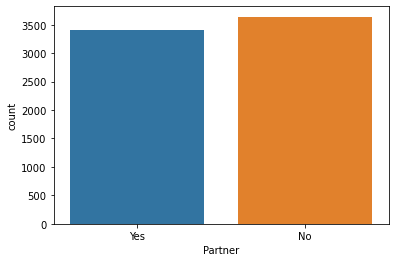

In [29]:
sns.countplot(df.Partner)

* There is are balanced ratio between the partnered and indivudal connections customers.

In [30]:
# Dependent

In [31]:
df.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

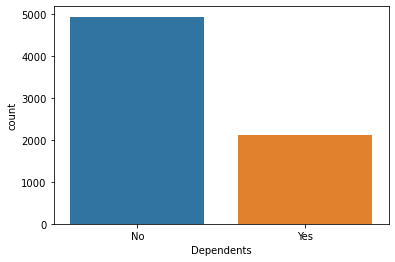

In [32]:
sns.countplot(df.Dependents)

* Most of the customers are independent.
* The dependency of a customer is mainly as the customer is minor od dependent on another individual from paying the bills.

In [33]:
# tenure 

* Thenure is the total months from which the customers has availed the service.

In [34]:
df.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

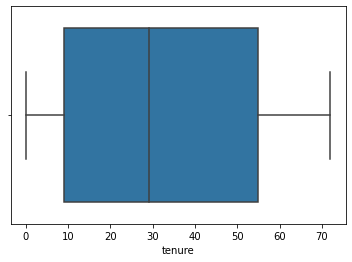

In [35]:
sns.boxplot(df.tenure)

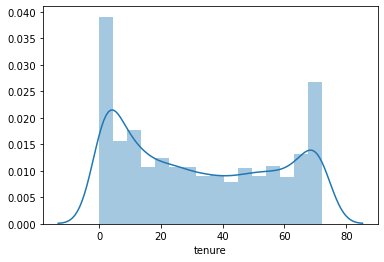

In [36]:
sns.distplot(df.tenure)

In [37]:
df.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [38]:
# phone service

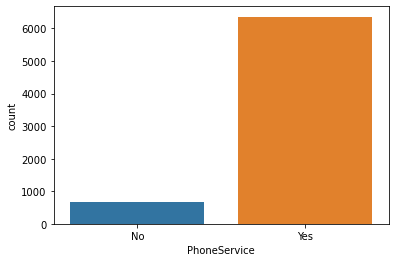

In [39]:
sns.countplot(df.PhoneService)

In [40]:
df[df.PhoneService == 'No']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,4501-VCPFK,Male,0,No,No,26,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.5,No
7007,2274-XUATA,Male,1,Yes,No,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),63.10,4685.55,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No


In [41]:
# multiline

In [42]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

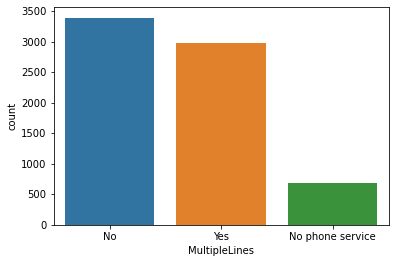

In [43]:
sns.countplot(df.MultipleLines,order = df.MultipleLines.value_counts().index)

In [44]:
df[df.MultipleLines == 'No phone service']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,4501-VCPFK,Male,0,No,No,26,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.5,No
7007,2274-XUATA,Male,1,Yes,No,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),63.10,4685.55,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No


* Customers equally use the multiline are single line phone services.

In [45]:
# internet servies

* does the cusomer avail the internet services or not, if they do, what type of connected they have,

In [46]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [47]:
df.InternetService.value_counts()/len(df) * 100

Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64

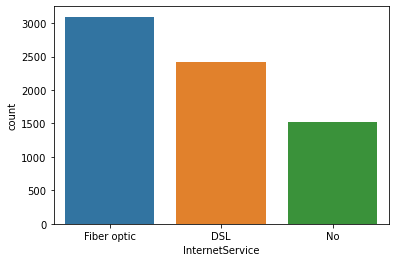

In [48]:
sns.countplot(df.InternetService,order=df.InternetService.value_counts().index)

* Most of the customers have opted for Fibre Optic as it is the fasted and highest bandwidth connumication meduim.
* Fibre optic being able to have a very high speed, the cost for the fibre optics is high, thus many of the custmers also prefer DSL i.e., Digital Subscriber Line.
* Yet 31 percent of the customers prefer not hing any internet connection.

In [49]:
df[df.InternetService == 'No']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
7019,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826,No
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No


In [50]:
# 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'

* There above are the services on can avail only if they had availed the internet service.

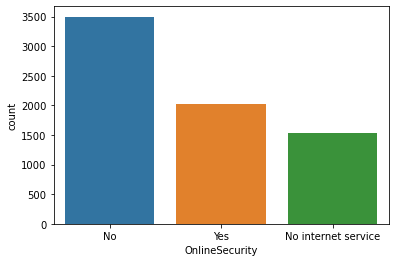

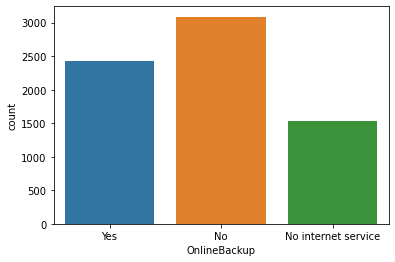

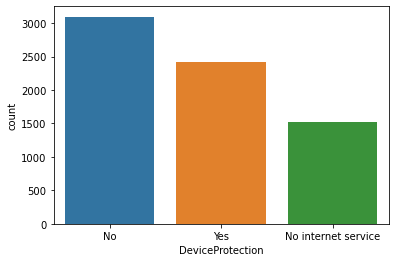

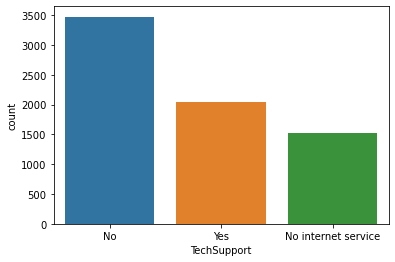

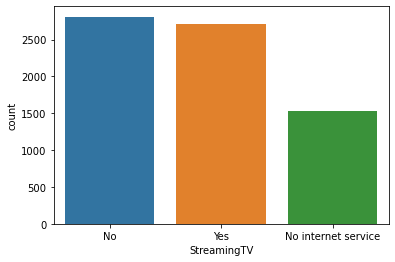

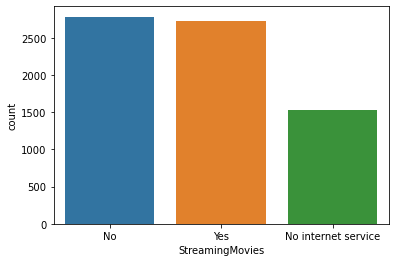

In [65]:
for service in  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies':
    plt.figure()
    sns.countplot(df[service],hue_order={'Yes':'r','No':'blue','No internet service':'green'})
    sns.countplot(df[service])

In [67]:
# contract

In [68]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

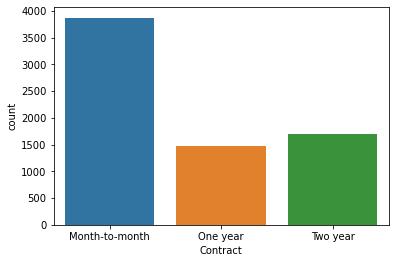

In [69]:
sns.countplot(df.Contract)

* Customers mostly prefer the month to month contract.

In [71]:
# payments mathod

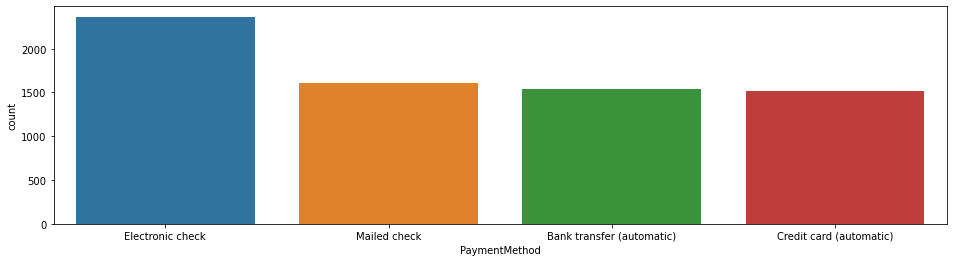

In [73]:
plt.figure(figsize=(16,4))
sns.countplot(df.PaymentMethod)

* Electrnic Check is preferreed mostly by the customers.

In [77]:
# monthly charges and total monthly charges.

In [78]:
df.MonthlyCharges

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

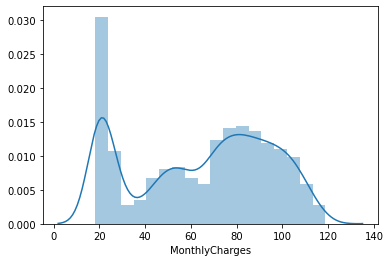

In [90]:
sns.distplot(df.MonthlyCharges)

In [93]:
# Total Monthly charges.

In [96]:
df.TotalCharges.dtype

dtype('O')

In [99]:
df[df.TotalCharges == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [100]:
len(df[df.TotalCharges == ' '])

11

In [102]:
df.TotalCharges.replace(' ',np.nan,inplace=True)

In [103]:
df.TotalCharges = df.TotalCharges.astype('float')

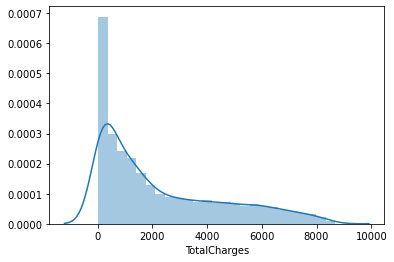

In [104]:
sns.distplot(df.TotalCharges)

In [108]:
# Churn

* This is the target variable. 
* If churn is yes, then the customer might leave/stop the service and if no if otherwise.

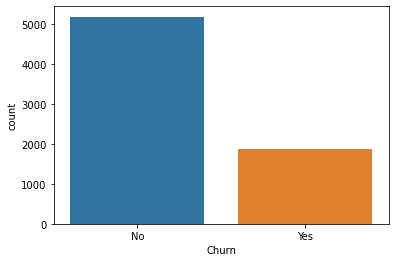

In [110]:
sns.countplot(df.Churn)

In [111]:
df.Churn.value_counts()/len(df) *100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

So we have the target classes in the 25 to 75 ratio.

## Multivariate anaysis.

In [113]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [119]:
# internet service vs the monthly price

In [333]:
# helper function
def fig_this_size(x,y):
    return plt.figure(figsize=(x,y))

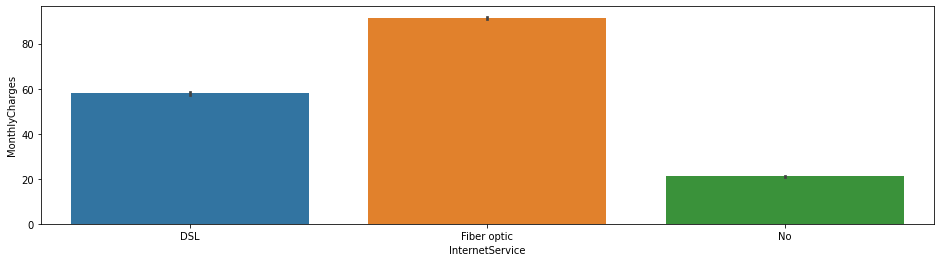

In [122]:
fig_this_size(16,4)
sns.barplot(df.InternetService,df.MonthlyCharges)

* Fibre poptics are costly than DSL 

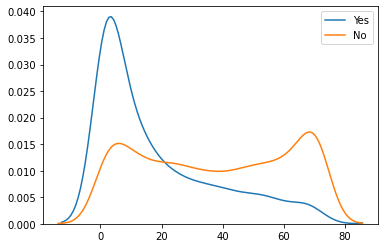

In [125]:
# tenure vs churn
sns.kdeplot(df[df.Churn == 'Yes']['tenure'],label='Yes')
sns.kdeplot(df[df.Churn != 'Yes']['tenure'],label='No')

* The customers with lower tenures tend to stop the services.
* The regular custmers are distributed uniformly.

In [127]:
# multiple lines vs monthly bills

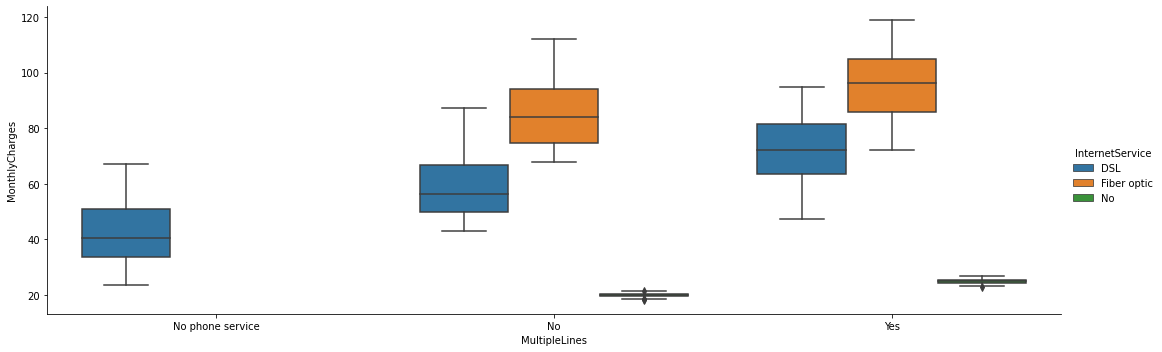

In [139]:
sns.catplot(x='MultipleLines',y='MonthlyCharges',data=df,kind='box',hue='InternetService',aspect=3)

In [148]:
# payment method vs tenure

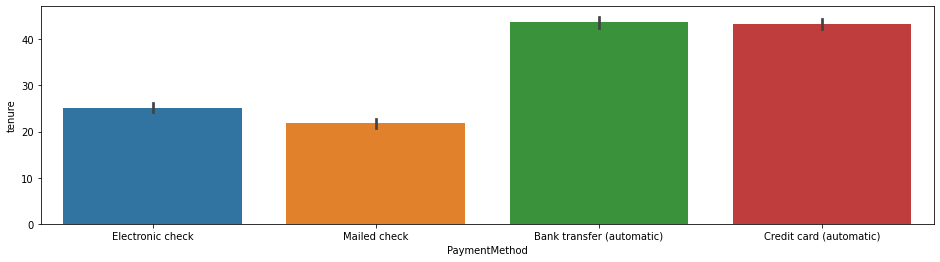

In [149]:
fig_this_size(16,4)
sns.barplot(df.PaymentMethod,df.tenure)

* The cutomers with high lenure are very likely to have automatic payment method (bank transfers and credit cards).

In [150]:
# Total charges vs chruns

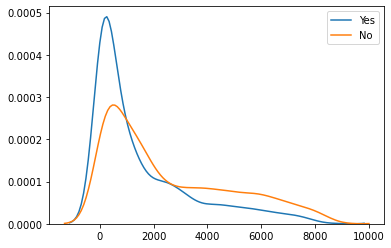

In [154]:
sns.kdeplot(df[df.Churn == 'Yes']['TotalCharges'],label='Yes')
sns.kdeplot(df[df.Churn != 'Yes']['TotalCharges'],label='No')

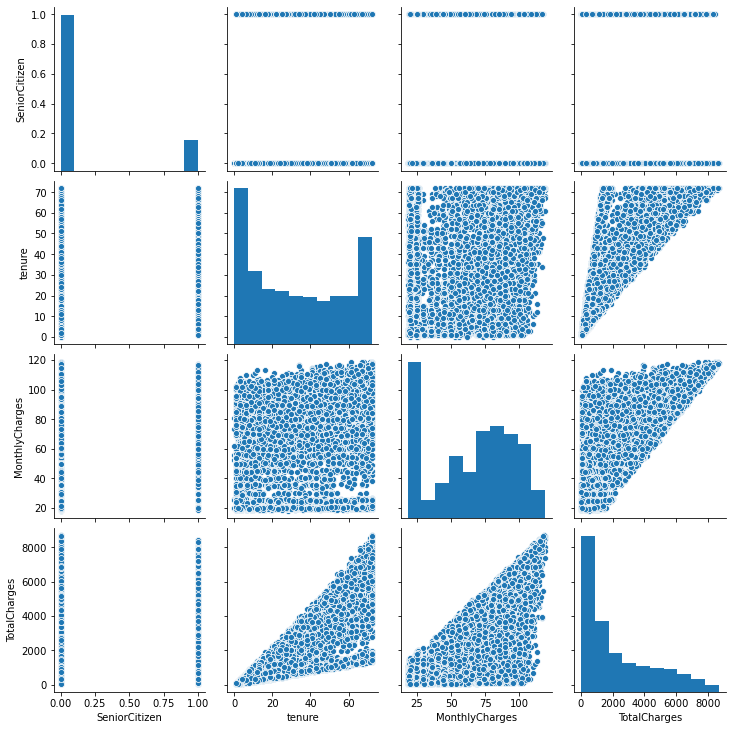

In [157]:
sns.pairplot(df)

In [160]:
# the internet services

In [161]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [162]:
df[df.InternetService == 'No']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
7019,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826.00,No
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239.00,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No


In [184]:
sub_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies','MonthlyCharges']

In [201]:
df_sub_services = df[df.InternetService != 'No'][sub_services]

In [202]:
df_sub_services.head()

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges
0,No,Yes,No,No,No,No,29.85
1,Yes,No,Yes,No,No,No,56.95
2,Yes,Yes,No,No,No,No,53.85
3,Yes,No,Yes,Yes,No,No,42.30
4,No,No,No,No,No,No,70.70


In [203]:
df_sub_services = df_sub_services.replace({'Yes':1,'No':0})

In [204]:
df_sub_services

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges
0,0,1,0,0,0,0,29.85
1,1,0,1,0,0,0,56.95
2,1,1,0,0,0,0,53.85
3,1,0,1,1,0,0,42.30
4,0,0,0,0,0,0,70.70
...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,84.80
7039,0,1,1,0,1,1,103.20
7040,1,0,0,0,0,0,29.60
7041,0,0,0,0,0,0,74.40


In [205]:
df_sub_services['AverageServices'] = df_sub_services.iloc[:,:-1].sum(axis=1)

In [206]:
df_sub_services

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,AverageServices
0,0,1,0,0,0,0,29.85,1
1,1,0,1,0,0,0,56.95,2
2,1,1,0,0,0,0,53.85,2
3,1,0,1,1,0,0,42.30,3
4,0,0,0,0,0,0,70.70,0
...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,84.80,5
7039,0,1,1,0,1,1,103.20,4
7040,1,0,0,0,0,0,29.60,1
7041,0,0,0,0,0,0,74.40,0


In [207]:
# average service vs monthly charges

In [208]:
df_sub_services.corr()['MonthlyCharges']

OnlineSecurity      0.069118
OnlineBackup        0.252337
DeviceProtection    0.321927
TechSupport         0.134233
StreamingTV         0.532439
StreamingMovies     0.525495
MonthlyCharges      1.000000
AverageServices     0.536399
Name: MonthlyCharges, dtype: float64

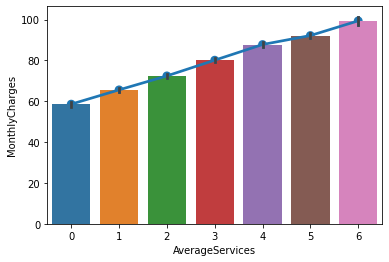

In [211]:
sns.pointplot(df_sub_services.AverageServices,df_sub_services.MonthlyCharges)
sns.barplot(df_sub_services.AverageServices,df_sub_services.MonthlyCharges)

In [212]:
# The monthly charges increase as the number od subproducts increase.

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [245]:
## Removing the outliers from the dataset.

In [276]:
df.SeniorCitizen = df.SeniorCitizen.astype(object)

In [300]:
df.SeniorCitizen.dtype

dtype('O')

In [306]:
df.SeniorCitizen.replace({0:'No',1:'Yes'},inplace=True)

In [307]:
df.SeniorCitizen

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7043, dtype: object

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [309]:
# revised category and numerical feautres.
num_var = _find_numerical_variables(df)
cat_var = _find_categorical_variables(df)

In [310]:
num_var

['tenure', 'MonthlyCharges', 'TotalCharges']

In [311]:
cat_var

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [405]:
# creating the copy of the raw dataset for preporcessing and model building.
df_cleaned = df.copy()

In [407]:
df_cleaned.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [415]:
# drop the 11 samples with TotalCharge = np.nan

In [418]:
df_cleaned.dropna(subset=['TotalCharges'],inplace=True)

In [419]:
df_cleaned.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

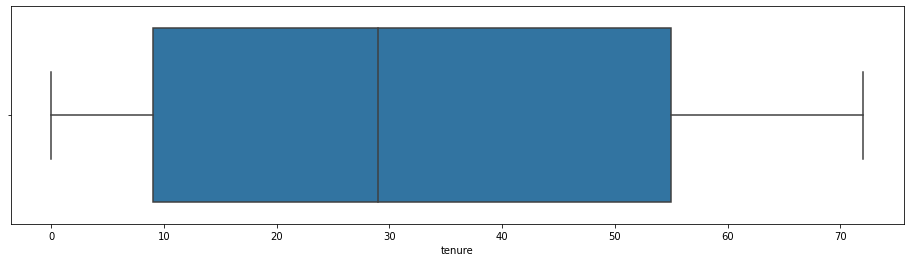

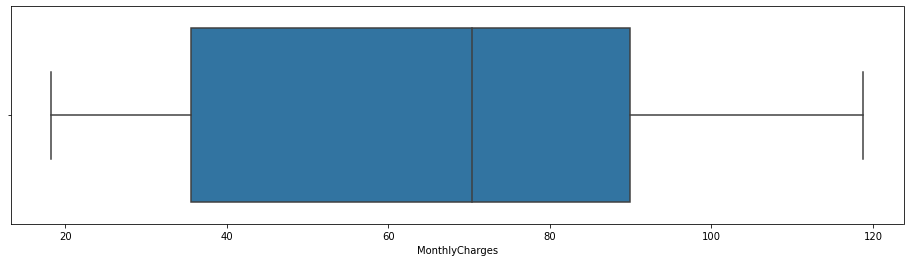

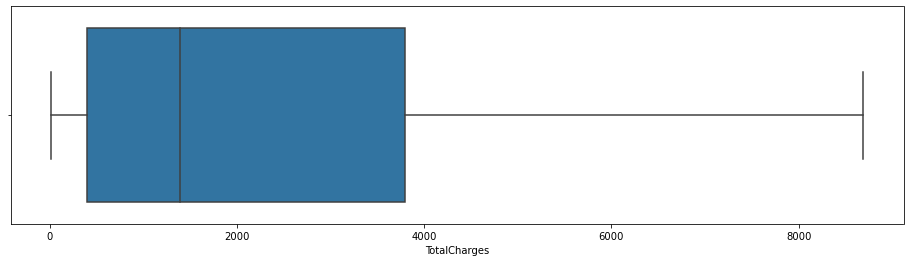

In [420]:
for col in num_var:
    fig_this_size(16,4)
    sns.boxplot(df[col])

In [421]:
# there are no outliers in the dataset too !

In [422]:
## Skew of the datasets' numericl features 

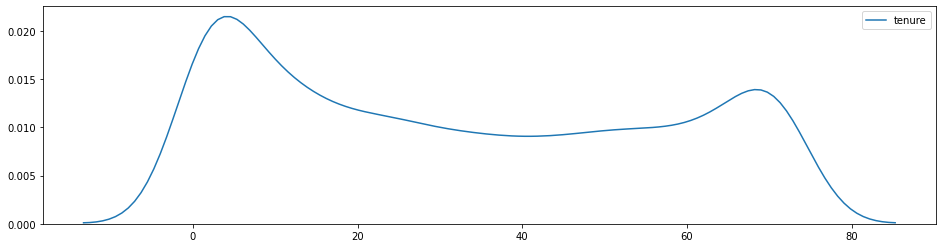

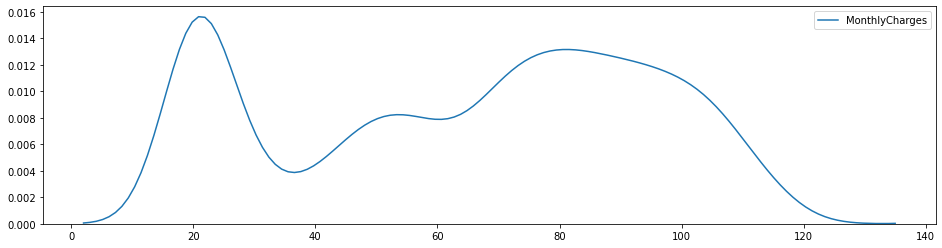

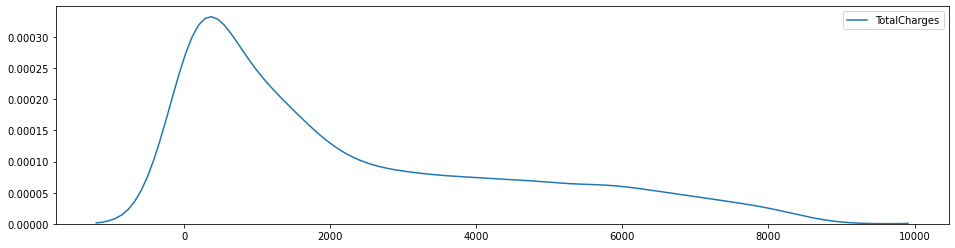

In [423]:
for col in num_var:
    fig_this_size(16,4)
    sns.kdeplot(df[col])

In [424]:
# skew stats

In [425]:
df.skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [426]:
# addressing the skew

In [427]:
# try1 : log transforation
np.log1p(df_cleaned[num_var]).skew()

tenure           -0.774128
MonthlyCharges   -0.720968
TotalCharges     -0.743089
dtype: float64

In [428]:
# try2 : Sqrt transforation
np.sqrt(df_cleaned[num_var]).skew()

tenure           -0.234197
MonthlyCharges   -0.486283
TotalCharges      0.308926
dtype: float64

In [429]:
# try3 : Cbrt transformation
np.cbrt(df_cleaned[num_var]).skew()

tenure           -0.446701
MonthlyCharges   -0.570884
TotalCharges      0.012819
dtype: float64

* The square root transformation works better when the features has poisitive skew,thus it works well here too..

In [430]:
df_cleaned[num_var] = np.sqrt(df_cleaned[num_var])

In [431]:
# skew before and after

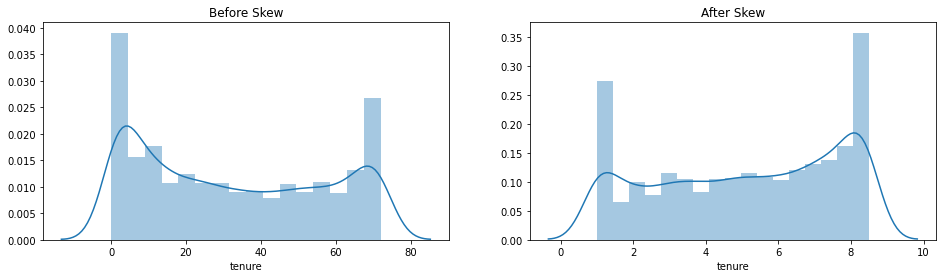

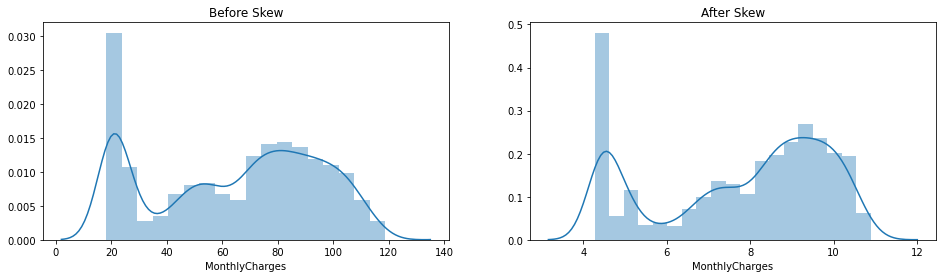

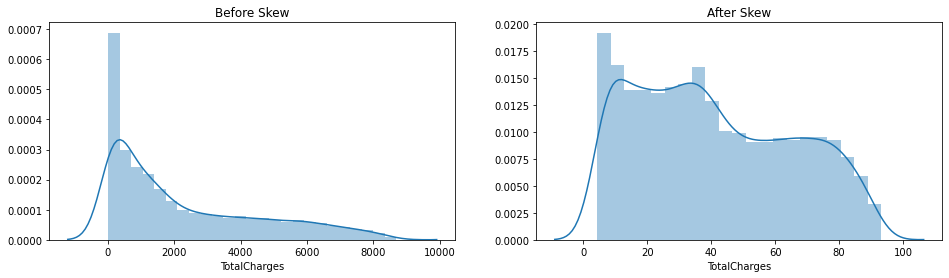

In [432]:
for col in num_var:
    fig = fig_this_size(16,4)
    
    fig.add_subplot(121)
    sns.distplot(df[col])
    plt.title('Before Skew')
    fig.add_subplot(122)
    sns.distplot(df_cleaned[col])
    plt.title('After Skew')
    

## One Hot Encoding

In [433]:
# before one hot encoding the features,we need no remove the redundant columns.
df_cleaned.drop('customerID',1,inplace=True)

In [434]:
# revised feautre types
num_var = _find_numerical_variables(df_cleaned)
cat_var = _find_categorical_variables(df_cleaned)

In [435]:
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

In [436]:
ohc = OneHotCategoricalEncoder(variables=cat_var,drop_last=True)

In [437]:
df_cleaned

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1.000000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,5.463515,5.463515,No
1,Male,No,No,No,5.830952,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,7.546522,43.468379,No
2,Male,No,No,No,1.414214,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,7.338256,10.399519,Yes
3,Male,No,No,No,6.708204,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),6.503845,42.903963,No
4,Female,No,No,No,1.414214,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,8.408329,12.314625,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,4.898979,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,9.208692,44.615020,No
7039,Female,No,Yes,Yes,8.485281,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),10.158740,85.807342,No
7040,Female,No,Yes,Yes,3.316625,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,5.440588,18.613167,No
7041,Male,Yes,Yes,No,2.000000,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,8.625543,17.509997,Yes


In [438]:
df_cleaned = ohc.fit_transform(df_cleaned)

In [439]:
df_cleaned.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,SeniorCitizen_No,Partner_Yes,Dependents_No,PhoneService_No,MultipleLines_No phone service,MultipleLines_No,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,PaperlessBilling_Yes,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),Churn_No
0,1.000000,5.463515,5.463515,1,1,1,1,1,1,0,...,0,1,0,1,0,1,1,0,0,1
1,5.830952,7.546522,43.468379,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1
2,1.414214,7.338256,10.399519,0,1,0,1,0,0,1,...,0,1,0,1,0,1,0,1,0,0
3,6.708204,6.503845,42.903963,0,1,0,1,1,1,0,...,0,1,0,0,1,0,0,0,1,1
4,1.414214,8.408329,12.314625,1,1,0,1,0,0,1,...,0,1,0,1,0,1,1,0,0,0


In [440]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## X and y split

In [441]:
X = df_cleaned.drop('Churn_No',1)
y = df_cleaned['Churn_No']

In [442]:
X.shape,y.shape

((7032, 30), (7032,))

## Train and Test Splits

In [443]:
from sklearn.model_selection import train_test_split

In [444]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [445]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4922, 30), (4922,), (2110, 30), (2110,))

## Building the model

In [446]:
# importing the training dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [447]:
# importing the evalation metrics 
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,classification_report

In [448]:
# helper funciton
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    print('Train_Acc:', model.score(X_train,y_train))
    print('Test_Acc:', model.score(X_test,y_test))
    print('Recall:', recall_score(y_test,model.predict(X_test),average='micro'))
    print('Precision:',recall_score(y_test,model.predict(X_test),average='micro'))
    print('F1:',recall_score(y_test,model.predict(X_test),average='micro'))


In [449]:
# try1 : Logistic Regression

train_n_ret_scores(LogisticRegression())

Train_Acc: 0.8114587566030069
Test_Acc: 0.7971563981042654
Recall: 0.7971563981042654
Precision: 0.7971563981042654
F1: 0.7971563981042654


In [450]:
#try2: SVC
train_n_ret_scores(SVC())

Train_Acc: 0.7927671678179602
Test_Acc: 0.7796208530805687
Recall: 0.7796208530805687
Precision: 0.7796208530805687
F1: 0.7796208530805687


In [451]:
#try3: KNN
train_n_ret_scores(KNeighborsClassifier())

Train_Acc: 0.8488419341731004
Test_Acc: 0.771563981042654
Recall: 0.771563981042654
Precision: 0.771563981042654
F1: 0.771563981042654


In [452]:
#try5: Decision Treaes
train_n_ret_scores(DecisionTreeClassifier())

Train_Acc: 0.9985778138967899
Test_Acc: 0.7203791469194313
Recall: 0.7203791469194313
Precision: 0.7203791469194313
F1: 0.7203791469194313


In [453]:
#try4: Random Forest
train_n_ret_scores(RandomForestClassifier())

Train_Acc: 0.9985778138967899
Test_Acc: 0.7815165876777251
Recall: 0.7815165876777251
Precision: 0.7815165876777251
F1: 0.7815165876777251


In [454]:
#try5: Gadient Boosting
train_n_ret_scores(GradientBoostingClassifier())

Train_Acc: 0.8321820398212109
Test_Acc: 0.7938388625592417
Recall: 0.7938388625592417
Precision: 0.7938388625592417
F1: 0.7938388625592417


In [455]:
#try6: Adaboost
train_n_ret_scores(AdaBoostClassifier())

Train_Acc: 0.8110524177163755
Test_Acc: 0.7943127962085308
Recall: 0.7943127962085308
Precision: 0.7943127962085308
F1: 0.7943127962085308


In [456]:
# choosing the best model


models = [LogisticRegression(),SVC(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200),GradientBoostingClassifier(n_estimators=150),AdaBoostClassifier(RandomForestClassifier())]
model_names = 'Logistic_reg SVC KNN Random_forest Decision_Treee Gradient_boost Adaboost'.split()
models_df = pd.DataFrame(columns=['Algo','Train_acc','Test_acc','Precision','Recall','F1_score','Avg_CV'])

for (model,model_names) in zip(models,model_names):
    print(model_names)
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    prec = precision_score(y_test,y_preds,average='micro')
    rec = recall_score(y_test,y_preds,average='micro')
    f1 = f1_score(y_test,y_preds,average='micro')
    
    avg_cv = np.mean(cross_val_score(model,X_train,y_train))
    
    models_df = models_df.append({'Algo':model_names,'Train_acc':train_acc,'Test_acc':test_acc,'Precision':prec,'Recall':rec,'F1_score':f1,'Avg_CV':avg_cv},ignore_index=True)

Logistic_reg
SVC
KNN
Random_forest
Decision_Treee
Gradient_boost
Adaboost


In [457]:
models_df

,Algo,Train_acc,Test_acc,Precision,Recall,F1_score,Avg_CV
0,Logistic_reg,0.811459,0.797156,0.797156,0.797156,0.797156,0.805771
1,SVC,0.792767,0.779621,0.779621,0.779621,0.779621,0.790739
2,KNN,0.848842,0.771564,0.771564,0.771564,0.771564,0.776923
3,Random_forest,0.998578,0.725592,0.725592,0.725592,0.725592,0.727549
4,Decision_Treee,0.998578,0.782464,0.782464,0.782464,0.782464,0.792770
5,Gradient_boost,0.839293,0.793365,0.793365,0.793365,0.793365,0.800084
6,Adaboost,0.998578,0.778199,0.778199,0.778199,0.778199,0.791956


* Here We have Logistic Regression as the winner beating Gradient Boost with a margin of  0.005%.

In [460]:
# best model

In [461]:
best_model = LogisticRegression()

In [462]:
best_model.fit(X_train,y_train)

LogisticRegression()

In [463]:
y_preds = best_model.predict(X_test)

In [464]:
train_n_ret_scores(LogisticRegression())

Train_Acc: 0.8114587566030069
Test_Acc: 0.7971563981042654
Recall: 0.7971563981042654
Precision: 0.7971563981042654
F1: 0.7971563981042654


In [465]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.65      0.52      0.58       561
           1       0.84      0.90      0.87      1549

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



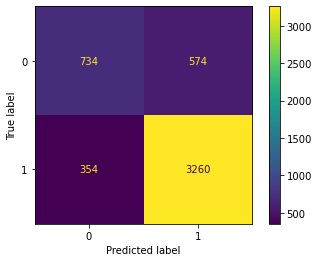

In [466]:
plot_confusion_matrix(best_model,X_train,y_train)

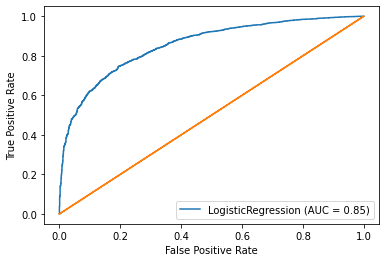

In [469]:
plot_roc_curve(best_model,X_train,y_train)
plt.plot(y_train,y_train)

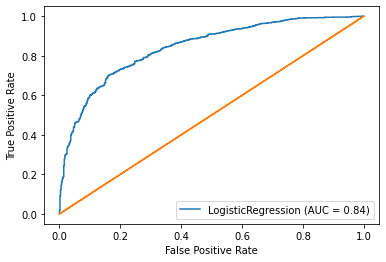

In [471]:
plot_roc_curve(best_model,X_test,y_test)
plt.plot(y_test,y_test)

## Saving the model.

In [473]:
import joblib
joblib.dump(best_model,'customer_churn.pkl')

['customer_churn.pkl']